# Feature Selection Methods

* Filter Methods: Uses metrics such as correlation
    * Correlation
    * Chi Square
    * ANOVA
    * Information Gain
* Wrapper Methods: Uses algorithms and stats to find optimal features
    * Forward Selection
    * Backward Selection
    * Stepwise Selection
* Embedded Methods: Selects features during model building
    * Lasso
    * Ridge
    * Elastic Net

## Filter Methods

* **Correlation:**
    * Filter methods use statistical measures to evaluate the relationship between each feature and the target variable, without involving a machine learning model. Correlation measures the linear relationship.
* **Variance Inflation Factor (VIF):**
    * As discussed, VIF assesses multicollinearity among features, which is a statistical measure independent of any specific model.
* **Mutual Information:**
    * Mutual information measures the statistical dependence between two variables, capturing both linear and non-linear relationships.
* **Chi-Square:**
    * Chi-square tests the independence between categorical variables, assessing their relationship without a model.
* **Variance Threshold:**
    * This method removes features with low variance, assuming that features with higher variance contain more information.



**Important Notes:**

* The lines between these categories can sometimes be a bit blurry, and some methods can have characteristics of multiple categories.
* The choice of feature selection method depends on the specific problem, the type of data, and the goals of the analysis.


### Correlation

* **Explanation:** Measures the linear relationship between each feature and the target variable. Features with high correlation (positive or negative) are likely to be more important.
* **Code:**

```python
import pandas as pd

# Assuming X is a pandas DataFrame
correlations = X.corrwith(y)
print(correlations)
```



### Variance Inflation Factor (VIF)

* **Explanation:**  Quantifies the severity of multicollinearity (high correlation between features).  Features with high VIF (> 5 or 10) are often redundant and can be removed.
* **Code:**

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
  vif = pd.DataFrame()
  vif["features"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

vif_data = calculate_vif(X)
print(vif_data)
```



### Mutual Information

* **Explanation:** Measures the amount of information shared between two variables. Can capture non-linear relationships between features and the target, making it suitable for regression.
* **Code:**

```python
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X, y)
print(mi_scores)
```



### Chi-Square

* **Explanation:** Primarily used for categorical features to test their independence from the target variable. **Not directly applicable to continuous targets in regression.**



### Variance Threshold

* **Explanation:** Removes features with low variance, as they are less likely to provide useful information.
* **Code:**

```python
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1) # Features with variance below this threshold will be removed
X_new = selector.fit_transform(X)
```



## Wrapper Methods


**Wrapper Methods** are a class of feature selection techniques that use a specific machine learning model as a "wrapper" or black box. The method trains the model repeatedly on different subsets of features and evaluates the model's performance (e.g., accuracy, $\text{R}^2$, $\text{AIC}$) to determine the optimal set of features.

***

## Stepwise Feature Selection

**Stepwise Feature Selection** is an iterative technique designed to find the most relevant feature subset by adding or removing features based on their statistical significance or contribution to the model's performance. It's considered a **greedy algorithm** because it makes the locally optimal choice at each step, which means it can sometimes get **stuck in local minimums** and may not find the globally optimal feature set.

### 1. Forward Stepwise Selection

| Feature | Description | Pros | Cons |
| :--- | :--- | :--- | :--- |
| **Process** | Starts with an **empty model** (no features). Iteratively **adds the most significant feature** at each step (based on $p$-values, $\text{AIC}$, or $\text{BIC}$). Stops when adding more features doesn't significantly improve the model. | Relatively simple and can be computationally **efficient** when the initial feature set is large. | May **miss interactions** between features and can be sensitive to the order features are added. |

### 2. Backward Stepwise Elimination

| Feature | Description | Pros | Cons |
| :--- | :--- | :--- | :--- |
| **Process** | Starts with a **full model** (all features). Iteratively **removes the least significant feature** at each step. Stops when removing more features significantly degrades the model. | Effective at identifying **redundant features** and can be more robust to feature interactions than the forward method. | Can be computationally **expensive** when starting with a very large number of features. The process can be contaminated if the initial full model is severely overfit. |

### 3. Bidirectional Stepwise Selection

| Feature | Description | Pros | Cons |
| :--- | :--- | :--- | :--- |
| **Process** | **Combines both forward and backward selection.** At each step, it assesses whether adding a feature or removing a feature provides the greatest improvement in model performance. | Often **more effective** than either single-direction method alone, as it can correct for early-stage mistakes. | **More complex** to implement and can be computationally intensive due to the double evaluation at each step. |

***

## Recursive Feature Elimination (RFE)

**Recursive Feature Elimination (RFE)** is a specialized and highly effective wrapper method that works in a backward elimination manner, but relies on the model's internal feature importance ranking.

* **Mechanism:** RFE **repeatedly builds a model** (e.g., a linear regression or decision tree) and then uses the model's internal coefficient magnitude or feature importance score to rank the features. It **removes the least important feature(s)** based on this ranking and repeats the process until the desired number of features is reached.
* **Evaluation:** The performance of the resulting feature set is evaluated by an external score (e.g., cross-validation).

### General Wrapper Method Considerations

Wrapper methods are powerful but must be used with caution:

* **Risk of Overfitting:** They are prone to **overfitting** because the selection process is highly tuned to the chosen model and the training data. This is why **cross-validation** is critical for accurately evaluating the performance of the selected features.
* **Methodological Error:** They can lead to **biased results** if the underlying statistical assumptions of the model are severely violated.

### Stepwise Feature Selection

* See DSChunks Stepwise Feature Selection

### Recursive Feature Elimination (RFE)

* **Explanation:**  Recursively removes features by training a model and eliminating the least important feature at each step.
* **Code:**

```python
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=5) # Select the top 5 features
X_new = selector.fit_transform(X, y)
```



## Embedded Methods


**Wrapper Methods** treat the machine learning model as a "black box" to evaluate feature subsets. They repeatedly train the model on different feature subsets and use the model's performance (e.g., accuracy, $\text{R}^2$, $\text{AIC}$) to iteratively search for the optimal set of features.

***

## Stepwise Feature Selection

**Stepwise Selection** is a **greedy algorithm** that iteratively adds or removes features based on their statistical significance or contribution to model performance. Because it only makes the locally optimal choice at each step, it risks getting **stuck in local minimums** and may miss the best global feature subset.

### 1. Forward Stepwise Selection

* **Process:** The process **starts with an empty model** (no features) and iteratively **adds the most significant feature** at each step. It stops when adding more features doesn't significantly improve performance.
* **Pros:** It's relatively simple and can be computationally **efficient** when dealing with a large initial feature set.
* **Cons:** It can be sensitive to the order in which features are added and may **miss crucial feature interactions**.

### 2. Backward Stepwise Elimination

* **Process:** The process **starts with a full model** (all features) and iteratively **removes the least significant feature** at each step. It stops when removing another feature significantly degrades the model.
* **Pros:** It's effective at identifying **redundant features** and tends to be more robust to feature interactions than forward selection.
* **Cons:** It can be computationally **expensive** with very large feature sets, and if the initial full model is overfit, that contamination can carry over.

### 3. Bidirectional Stepwise Selection

* **Process:** This method **combines both forward and backward steps**, assessing at each iteration whether adding a feature or removing an existing feature yields the greatest improvement.
* **Pros:** It's often **more effective** than single-direction methods, as it can compensate for initial suboptimal choices.
* **Cons:** It's more complex to implement and can be computationally intensive due to the double evaluation at each step.

***

## Recursive Feature Elimination (RFE)

**Recursive Feature Elimination (RFE)** is a highly effective wrapper method that employs a backward elimination strategy based on the model's internal feature ranking.

* **Mechanism:** RFE **repeatedly builds a model** (e.g., a linear model or decision tree) and uses the model's internal metric (like coefficient magnitude or feature importance score) to **rank the features**. It then **removes the least important feature(s)** and repeats the process until the desired number of features is reached.
* **Evaluation:** The performance of the resulting feature set is typically assessed using an external score like **cross-validation**.

***

## General Wrapper Method Considerations

Wrapper methods are powerful but carry specific risks:

* **Risk of Overfitting:** They are prone to **overfitting** because the feature selection process is tightly coupled (tuned) to the training data and the chosen model. **Cross-validation** is critical to accurately evaluate the generalizability of the final feature set.
* **Bias Risk:** These methods can lead to **biased results** if the underlying statistical assumptions of the model used for evaluation are violated.

### Regularization

**Regularization** is a technique used in machine learning to **prevent overfitting** by deliberately adding a penalty for complexity to the model's training process. This encourages the model to find a simpler solution that generalizes better to unseen data.

### Overfitting Analogy

Overfitting occurs when a model learns the training data, including the noise and outliers, **too well**. As you described: memorizing every single word in a textbook might lead to a perfect test score if questions are literal, but the model will struggle with questions that require applying the **broader concepts** to new scenarios.

***

## The Mechanism of Regularization

Regularization works by modifying the objective function the model seeks to minimize during training:

1.  **Penalty Term:** A penalty term is **added to the loss function** (which measures the error between predictions and actual values).
2.  **Complexity Control:** The penalty is based on the **complexity of the model**, which is typically measured by the **size of the model's coefficients (weights)**. Larger coefficients imply a more complex model that is sensitive to small changes in the input data.
3.  **Balance:** This forces the learning algorithm to find a **balance** between two goals:
    * **Fitting the training data well** (minimizing the original loss).
    * **Keeping the model simple** (minimizing the size of the coefficients).

***

## Types of Regularization

The two main types of regularization differ in how they calculate the penalty, leading to different effects on the model's coefficients:

### 1. L2 Regularization (Ridge Regression)
* **Penalty:** Adds a penalty term proportional to the **sum of the squared values** of the coefficients ($\sum \beta^2$).
* **Effect:** This forces the coefficients to **shrink toward zero** (but rarely exactly to zero), making them smaller and less sensitive to individual data points. This leads to a smoother, less complex model.

### 2. L1 Regularization (Lasso Regression)
* **Penalty:** Adds a penalty term proportional to the **sum of the absolute values** of the coefficients ($\sum |\beta|$).
* **Effect:** This penalty can force some coefficients to become **exactly zero**. By zeroing out coefficients for irrelevant features, $\text{L1}$ regularization effectively performs **built-in feature selection**.

***

## Benefits of Regularization

Regularization is a crucial tool for building reliable machine learning models:

* **Prevents Overfitting:** The core benefit is ensuring the model generalizes well to new, previously unseen data.
* **Improves Model Stability:** By penalizing extreme weights, the model becomes less sensitive to small changes or noise in the training data.
* **Feature Selection (Lasso):** $\text{L1}$ regularization is valuable for automatically identifying and excluding the least important features from the final model.

https://towardsdatascience.com/which-features-are-harmful-for-your-classification-model-6227859a44a6

Gemini, Oct 16 2024

### Lasso (L1 Regularization)

* **Explanation:** Lasso adds a penalty to the sum of the absolute values of the model coefficients. This forces some coefficients to become exactly zero, effectively performing feature selection. It's great for datasets with many potentially irrelevant features.
* **Code:**

```python
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming X is your feature matrix and y is your target variable
pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.1))  # alpha controls the regularization strength
pipeline.fit(X, y)

# Get the selected features (those with non-zero coefficients)
selected_features = X.columns[pipeline[-1].coef_ != 0]
print(selected_features)
```

### Ridge (L2 Regularization)

* **Explanation:** Ridge adds a penalty to the sum of the squared values of the coefficients. It shrinks the coefficients towards zero, reducing the impact of less important features but generally doesn't make them exactly zero. Useful when features are highly correlated.
* **Code:**

```python
from sklearn.linear_model import Ridge

pipeline = make_pipeline(StandardScaler(), Ridge(alpha=0.1))
pipeline.fit(X, y)

# All features are kept, but their importance is reflected in the coefficients
print(pipeline[-1].coef_)
```



### Elastic Net

* **Explanation:**  Elastic Net combines L1 and L2 regularization. It provides a balance between feature selection (L1) and coefficient shrinkage (L2).
* **Code:**

```python
from sklearn.linear_model import ElasticNet

pipeline = make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.5)) # l1_ratio controls the mix of L1 and L2
pipeline.fit(X, y)

# Similar to Lasso, some features might be eliminated
selected_features = X.columns[pipeline[-1].coef_ != 0]
print(selected_features)
```



### Select K Best

* **Explanation:** Selects the top k features based on a scoring function (e.g., f_regression for regression).
* **Code:**

```python
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=5) # Select the top 5 features
X_new = selector.fit_transform(X, y)
```



### Select From Model

* **Explanation:**  Selects features based on the importance scores assigned by an estimator (e.g., feature importances from a Random Forest or coefficients from a Linear model).
* **Code:**

```python
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector = SelectFromModel(estimator=RandomForestRegressor())
X_new = selector.fit_transform(X, y)
```



**Important Considerations:**

* **Scaling:**  Many feature selection methods (especially those involving distance calculations or regularization) benefit from scaling your features first (e.g., using `StandardScaler`).
* **Evaluation:** It's crucial to evaluate the performance of your model with the selected features using techniques like cross-validation to avoid overfitting.
* **Domain Knowledge:**  Always consider your domain knowledge when selecting features. Sometimes, features that might seem unimportant statistically can be crucial based on your understanding of the problem.

## Advanced Feature Selection and Dimensionality Reduction

Feature selection methods are broadly categorized based on how they evaluate the feature subset: independent of the model (**Filter**), using the model as an evaluator (**Wrapper**), or incorporating selection into the model training (**Embedded**).

### Filter Methods

Filter methods evaluate the relevance of features based on their intrinsic characteristics (like correlation with the target or independence from other features), *before* training a machine learning model.

* **ANOVA (Analysis of Variance):** Similar to the Chi-Square test, but used when the **target variable is categorical** and the **feature is continuous**. It tests whether the means of the continuous feature are significantly different across the distinct values of the target class.
* **Fisher Score:** Ranks features based on how well they **discriminate between different classes**. A feature with a high Fisher Score has small variation within the same class but large variation between different classes.
* **Minimum Redundancy Maximum Relevance (mRMR):** A sophisticated method that aims to select features that are **highly correlated with the target** (maximum relevance) but **minimally correlated with each other** (minimum redundancy), thus avoiding multicollinearity.
* **Distance Correlation:** A measure of dependence between two variables that can detect **both linear and non-linear relationships**, making it more flexible than standard Pearson correlation.

### Wrapper Methods

Wrapper methods use a predictive model to score feature subsets, requiring repeated training of the model.

* **Genetic Algorithms:** These methods apply principles of **biological evolution** (selection, crossover, mutation) to efficiently explore a large space of feature combinations, making them suitable for optimizing the feature subset. However, they can be **computationally expensive**.
* **Simulated Annealing:** Another **optimization technique** that avoids getting stuck in local optima by allowing "bad" moves with a certain probability (which decreases over time), leading to a high chance of finding better feature subsets.

### Embedded Methods

Embedded methods perform feature selection as an inherent part of the model training process, capturing interactions specific to that model.

* **Tree-based Feature Importance:** Algorithms based on decision trees (like **Decision Trees, Random Forests, and Extra Trees**) naturally rank features based on their contribution to **reducing impurity** (e.g., Gini impurity or information gain) during the construction of the tree.
* **Gradient Boosting Feature Importance:** Advanced tree-based ensembles like **XGBoost and LightGBM** provide highly reliable feature importance scores based on how often and how effectively a feature is used to improve the model during the sequential boosting process.

---

## Other Considerations

### Hybrid Methods

**Hybrid methods** leverage the strengths of different approaches. A common approach is to use a **filter method** (like a high-pass correlation filter) to quickly reduce the initial, large feature set, and then apply a more computationally demanding **wrapper method** (like RFE) for final refinement.

### Dimensionality Reduction

These techniques reduce the number of variables by **transforming** the original features into a new, smaller set of composite features, rather than selecting a subset:

* **Principal Component Analysis (PCA):** An unsupervised technique that creates new components that maximize variance, preserving most of the data's information.
* **Linear Discriminant Analysis (LDA):** A supervised technique that creates new components that maximize the separation between known classes.

### Choosing the Right Method

Selecting the best feature selection method is a decision based on trade-offs:

| Factor | Preferred Method | Rationale |
| :--- | :--- | :--- |
| **Very Large $N$ Features** | **Filter Methods** (e.g., Fisher Score) | Offers the fastest way to reduce dimensionality and conserve computational resources. |
| **Need High Accuracy** | **Wrapper or Embedded Methods** (e.g., RFE, Gradient Boosting) | Performance is tied directly to the model, leading to better predictive power. |
| **Need High Interpretability** | **Filter Methods** (Correlation) or **Tree-based Importance** | Results are simpler and easier to explain (e.g., "Feature A is $80\%$ more important"). |
| **Suspect Non-Linearity** | **Distance Correlation** or **Embedded Tree Methods** | These methods can capture complex relationships that linear models miss. |

Effective feature selection requires **experimentation** with different techniques and rigorous evaluation using cross-validation to find the optimal balance between performance, complexity, and interpretability.

## Recap

In [ ]:
# get data
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Project CICD/make_me_data_science_v.csv')
print(df.shape)
print(df.info())
df.head()

(1000, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   binary                             1000 non-null   int64  
 1   given_name                         1000 non-null   float64
 2   surname                            1000 non-null   float64
 3   date_of_birth                      1000 non-null   float64
 4   phone_number                       1000 non-null   float64
 5   email                              1000 non-null   float64
 6   address                            1000 non-null   float64
 7   city                               1000 non-null   float64
 8   state                              1000 non-null   float64
 9   zipcode                            1000 non-null   float64
 10  correlated w target 2              1000 non-null   float64
 11  standard scaling                   1000 non-nu

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,semi_constant_2_q_const_0_1,semi_constant_2_q_const_0_2,semi_constant_1_q_const_0_1,semi_constant_1_q_const_0_2,random label num 4_label num lo 2,random label num 4_label num lo 3,random label num 4_label num lo 4,random choice 4_North,random choice 4_South,random choice 4_West
0,1,0.316,0.001,0.001,0.001,0.001,0.370,0.379,0.220,0.376,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,0.001,0.001,0.202,0.001,0.001,0.001,0.001,0.014,0.376,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0.316,0.320,0.202,0.001,0.001,0.001,0.001,0.024,0.376,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.003,0.320,0.001,0.001,0.001,0.370,0.379,0.220,0.376,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,0.001,0.320,0.001,0.501,0.001,0.001,0.001,0.017,0.001,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
list_to_drop = ['binary',
 'given_name',
 'surname',
 'date_of_birth',
 'phone_number',
 'email',
 'address',
 'city',
 'state',
 'zipcode',
 'random label num 12',
 'random choice 2',
 'random choice 7']

In [ ]:
# keep binary and state since state would include city, later come back if state is important
# consider area codes for phone numbers
keepers = ['binary', 'state']
list_to_drop = [var for var in list_to_drop if var not in keepers]
list_to_drop

['given_name',
 'surname',
 'date_of_birth',
 'phone_number',
 'email',
 'address',
 'city',
 'zipcode',
 'random label num 12',
 'random choice 2',
 'random choice 7']

### Train Test Split

In [ ]:
# seed
import random

student_id = 123456789
random_state = random.seed(student_id)
random_state

In [ ]:
from sklearn.model_selection import train_test_split

list_to_drop.append('class')
X_train, X_test, y_train, y_test = train_test_split(df.drop(list_to_drop, axis=1), df['class'], test_size=0.3, random_state=random_state)
X_train.shape, X_test.shape

((700, 33), (300, 33))

### Variance Inflation Factor (Multicollinearity)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 237 to 177
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   binary                             700 non-null    int64  
 1   state                              700 non-null    float64
 2   correlated w target 2              700 non-null    float64
 3   standard scaling                   700 non-null    float64
 4   uniform corr 1                     700 non-null    float64
 5   informative_1                      700 non-null    float64
 6   outliers 1                         700 non-null    float64
 7   correlated w target 1              700 non-null    float64
 8   min max scaling                    700 non-null    float64
 9   target                             700 non-null    float64
 10  multicollinearity 4                700 non-null    float64
 11  pd qcut1                           700 non-null    int64  
 1

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
  vif = pd.DataFrame()
  vif["features"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

vif_data = calculate_vif(X_train)
print(vif_data)

                             features           VIF
0                              binary      1.033135
1                               state      1.061320
2               correlated w target 2      1.210521
3                    standard scaling      1.028955
4                      uniform corr 1      1.285483
5                       informative_1    183.164340
6                          outliers 1      1.041098
7               correlated w target 1      1.453390
8                     min max scaling      1.036659
9                              target  11020.492349
10                multicollinearity 4      1.127574
11                           pd qcut1      6.929600
12                multicollinearity 2      1.092022
13                multicollinearity 1      1.092845
14                      informative_2  11024.040838
15                 corr_feature_class      1.056937
16                     uniform corr 2      1.213401
17                           pd qcut3      1.217541
18          

In [ ]:
# iterate dropping features with high vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed1=[]
x_copy1 = X_train.copy()
max_vif = thresh = 10
while max_vif >= thresh:
  my_list = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
  max_vif = max(my_list)
  if max_vif > thresh:
    max_index = my_list.index(max_vif)
    removed1.append(x_copy1.columns[max_index])
    print(x_copy1.columns[max_index], variance_inflation_factor(x_copy1, max_index))
    x_copy1.drop(x_copy1.columns[max_index], axis=1, inplace=True)


# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy1.columns
vif["VIF"] = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
print(vif)

informative_2 11024.040838498024
standard scaling 14.586413363491346
pd qcut1 11.821332049284901
                             Variable       VIF
0                              binary  1.940290
1                               state  1.563930
2               correlated w target 2  1.371325
3                      uniform corr 1  2.537610
4                       informative_1  1.043194
5                          outliers 1  1.093143
6               correlated w target 1  1.457266
7                     min max scaling  5.297531
8                              target  3.387618
9                 multicollinearity 4  1.350273
10                multicollinearity 2  1.119110
11                multicollinearity 1  1.401793
12                 corr_feature_class  1.180246
13                     uniform corr 2  1.863757
14                           pd qcut3  4.046754
15                         outliers 2  2.823304
16                multicollinearity 3  1.173161
17                        pd qcut2_Q2  

In [ ]:
removed1
X_train.drop(removed1, axis=1, inplace=True)
X_test.drop(removed1, axis=1, inplace=True)

### OLS

In [ ]:
# OLS
# import statsmodels.api as sm

# X = X_train
# y = y_train
# X = sm.add_constant(X)

# ols_model = sm.OLS(y, X).fit()
# print(ols_model.summary())

### Lasso

In [ ]:
# lasso
# from sklearn.linear_model import Lasso
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

# X = X_train
# y = y_train
# pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.1))  # alpha controls the regularization strength
# pipeline.fit(X, y)

# # Get the selected features (those with non-zero coefficients)
# selected_features = X.columns[pipeline[-1].coef_ != 0]
# print(selected_features)

### Mutual Information

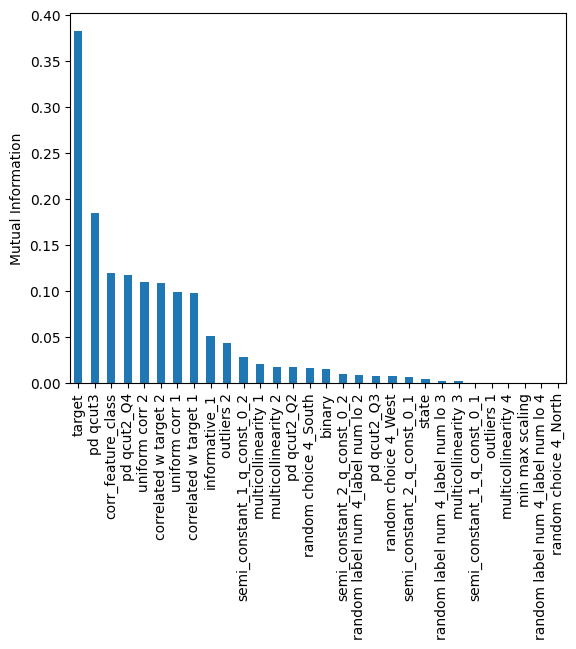

In [ ]:
# mutual information
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information');

In [ ]:
mi_keepers = mi.sort_values(ascending=False).index[:5]
print(mi_keepers)

Index(['target', 'pd qcut3', 'corr_feature_class', 'pd qcut2_Q4',
       'uniform corr 2'],
      dtype='object')


### Corrwith

In [ ]:
# X_train.corrwith(y_train).plot.bar(
#         title = "Correlation with Target",
#         rot = 90, grid = True);

In [ ]:
# corr_keepers = X_train.corrwith(y_train).sort_values(ascending=False).index[:5]
# print(corr_keepers)

### SelectKBest

In [ ]:
# SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

selector = SelectKBest(f_classif, k=5) # Select the top 5 features
X_new = selector.fit(X_train, y_train)

kb_keepers = X_train.columns.values[selector.get_support()]
print(kb_keepers)

['uniform corr 1' 'correlated w target 1' 'target' 'uniform corr 2'
 'pd qcut2_Q4']


### Select From Model

In [ ]:
# Select from model
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

selections = SelectFromModel(estimator=LogisticRegression()).fit(X_scaled, y_train)
mt_keepers = X_train.columns.values[selections.get_support()]
print(mt_keepers)

['target' 'corr_feature_class' 'uniform corr 2' 'pd qcut2_Q4'
 'semi_constant_2_q_const_0_1' 'random label num 4_label num lo 2'
 'random choice 4_North']


### Recursive Feature Elmination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=5) # Select the top 5 features
X_new = selector.fit_transform(X_scaled, y_train)
rf_keepers = X_train.columns.values[selections.get_support()]
print(rf_keepers)

['target' 'corr_feature_class' 'uniform corr 2' 'pd qcut2_Q4'
 'semi_constant_2_q_const_0_1' 'random label num 4_label num lo 2'
 'random choice 4_North']


### Random Forest Importance


In [ ]:
# random forest importance
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

selects = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=random_state), max_features=4)
selects.fit(X_train, y_train)
rfi = X_train.columns[(selects.get_support())]
rfi.tolist()

['correlated w target 2', 'informative_1', 'target', 'pd qcut2_Q4']

Scenario: We are trying to classify if a user will subscribe to our YouTube channel.

Lets grab the first four features from feature importance and rename them using the following suggestions:

**Numerical Features**

*   **Watch Time (seconds)**: Measures the total time viewers spend watching your videos.
*   **Average View Duration (seconds)**: The average length of time viewers watch a single video.
*   **Click-Through Rate (CTR)**: The percentage of viewers who click on your video after seeing the thumbnail/title.
*   **Comments per Video**: The number of comments on each video.
*   **Shares per Video**: The number of times each video is shared.
*   **Likes per Video**: The number of likes on each video.
*   **Dislikes per Video**: The number of dislikes on each video.
*   **Subscribers Gained per Video**: The number of subscribers gained after a video is published.
*   **Views per Video**: The total number of views for each video.

**Categorical Features**

*   **Video Category**: The category or genre of the video (e.g., tutorial, review, vlog).
*   **Upload Frequency**: How often you upload videos (e.g., daily, weekly, monthly).
*   **Video Length**: Categorize videos based on length (e.g., short, medium, long).
*   **Thumbnail Type**: The type of thumbnail used (e.g., image, text overlay, face).
*   **Use of Background Music**: Whether the video uses background music or not.
*   **Use of End Screens**: Whether the video includes end screens or not.
*   **Viewer Gender**: The dominant gender of your viewers (if available).
*   **Viewer Age**: The dominant age group of your viewers (if available).
*   **Viewer Location**: The primary location of your viewers (if available).

**Discrete Features**

*   **Number of Videos Uploaded**: The total number of videos on your channel.
*   **Channel Age (months)**: The age of your YouTube channel.
*   **Number of Playlists**: The total number of playlists on your channel.
*   **Use of Subtitles**: Whether your videos include subtitles (0 or 1).
*   **Use of Closed Captions**: Whether your videos include closed captions (0 or 1).
*   **Viewer Engagement Level**: Categorize viewer engagement into levels (e.g., low, medium, high).
*   **Video Quality**: Categorize video quality (e.g., low, medium, high).
*   **Subscriber Count**: The total number of subscribers to your channel.





In [ ]:
features_to_model = rfi
X_train[features_to_model].head()

,correlated w target 2,informative_1,target,pd qcut2_Q4
237,2.344954,-0.687455,-2.431055,0.0
243,0.105442,-0.003902,0.301662,0.0
464,-1.202249,-0.929756,-0.647602,0.0
263,-8.161661,1.573214,3.214699,1.0
952,-0.300050,3.496094,-3.816801,0.0


In [ ]:
new_column_names = {rfi[0]: 'watch_time', rfi[1]: 'avg_view_duration', rfi[2]: 'click_through_rate', rfi[3]: 'interest'}
X_train.rename(columns=new_column_names, inplace=True)
X_test.rename(columns=new_column_names, inplace=True)
features_to_model = list(new_column_names.values())
X_train[features_to_model].head()

,watch_time,avg_view_duration,click_through_rate,interest
237,2.344954,-0.687455,-2.431055,0.0
243,0.105442,-0.003902,0.301662,0.0
464,-1.202249,-0.929756,-0.647602,0.0
263,-8.161661,1.573214,3.214699,1.0
952,-0.300050,3.496094,-3.816801,0.0
